# TP01  - 17/02/2021

## Aprendizado Profundo para Processamento de Linguagem Natural

### **Aluno**: Leonam Rezende Soares de Miranda

### **Matrícula**: 2020681492

Os objetivos deste trabalho são:

* Realizar um pré-processamento dos dados para um modelo de linguagem;
* Aprenda um modelo de linguagem word2vec.
* Avalie o modelo.

### 1 - Leitura e Pré Processamento dos Dados

Será feito os seguintes pré processamento de dados:

1. ***Maiúsculas e minusculas***: todas as palavra serão passadas para minúsculas;
2. ***Pontuação***: Todos os sinais de pontuação de interrupção, como pontos finais, vírgulas e pontos de interrogação, serão representados como uma única palavra especial do vocabulário ('!' -> '.', '?' -> '.', etc). Serão ignorarados sinais de pontuação que não causam interrupção, como aspas(""). Caso haja pontos de vários sinais, como pontos de interrogação triplos (!!!), estes serão reduzido em apenas um ponto ".";
3. ***Números e Caracteres Especiais***:  Geralmente é seguro desconsiderá-los;
4. ***Remoção de Stopwords***


Para este trabalho, será utilizado o corpus text8 (http://mattmahoney.net/dc/) para construir os modelos de dados. 

O código a seguir importa o corpus já processado (palavras já estão em minúsculo, sem pontuação, sem números e sem caracteres especiais).

In [3]:
import numpy as np
import re  # load regex module
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import gensim.downloader as api 
from random import sample 

# importar dados já processados gensim.downloader as api
# Palavras já estão em minúsculo, sem pontuação, números e caracteres especiais
corpus = api.load('text8')
sentences = list(corpus)
print(sentences[0][0:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english']


O código a seguir remove as *stopwords* (conjunções, preposições, artigos, etc) e cria mais 2 corpus, que subamostram 75% e 50% das sentenças corpus, de forma aleatória, após remoção das *stopwords*. 

In [4]:
# Remove stopwords
stops = set(stopwords.words("english"))   

setencesProcessed = []
for sentence in sentences:
  setencesProcessed.append([word for word in sentence if not word in stops])
print('Número de sentenças corpus 100%: ' + str(len(setencesProcessed)))

setencesProcessed75 = sample(setencesProcessed, int(3*len(setencesProcessed)/4))
print('Número de sentenças corpus 75%: ' + str(len(setencesProcessed75)))

setencesProcessed50 = sample(setencesProcessed, int(len(setencesProcessed)/2))
print('Número de sentenças corpus 50%: ' + str(len(setencesProcessed50)))

Número de sentenças corpus 100%: 1701
Número de sentenças corpus 75%: 1275
Número de sentenças corpus 50%: 850


### 2. Metodologia e Alguns Testes

A partir do corpus serão construídos diferente modelos variando alguns hiperparâmetros:

* **Diferentes tamanhos de treinamento** (100%, 75%, 50%).
* **Diferentes tamanhos de dimensionalidade dos vetores de palavras** (100, 200, 300)
* **Diferentes tamanhos de janela** (Distância máxima entre a palavra atual e a prevista em uma frase) (5, 7, 10).
* **CBOW e Skip-Gram**.

Assim serão avaliados $3 \times 3 \times 3 \times 2 = 54$ modelos.

A imagem a seguir exemplifica a diferença entre os modelos CBOW e Skip-gram. A arquitetura CBOW prevê a palavra atual com base no contexto, e o Skip-gram prevê palavras circundantes dadas a palavra atual.

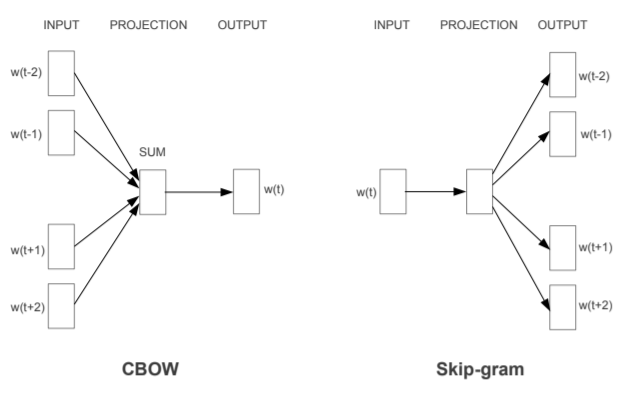

In [6]:
from IPython import display
display.Image("CBOW Skip-Gram.PNG")

Antes de avaliar os **54** modelos será executado um modelo de testes, utilizando todos os hiperparâmetros *default* da implementação da biblioteca *gensim* do algoritmo *Wor2Vec*.

In [7]:
from gensim.models import Word2Vec

# Criando o modelo e definindo valores para os vários parâmetros
num_features = 300   # Dimensionalidade de vetor de palavra
min_word_count = 2   # Ignora todas as palavras com frequência absoluta total menor que esta
num_workers = 4      # Número de threads paralelas utilizadas para treinar o modelo
context = 10         # A distância máxima entre a palavra atual e a prevista em uma frase. 
                     #Por exemplo. palavras da janela à esquerda e palavras da janela à esquerda do nosso alvo
downsampling = 1e-3  # (0.001) Configuração de downsampling para palavras frequentes

# Inicializando o modelo de treinamento
from gensim.models import word2vec
model = word2vec.Word2Vec(setencesProcessed)

In [12]:
# Alguns testes
# 1. Quais palavras possuem representações mais semelhantes a representação da palavra 'brazil'
model.wv.most_similar('brazil')

[('argentina', 0.8305641412734985),
 ('bolivia', 0.8166695237159729),
 ('uruguay', 0.8026964664459229),
 ('colombia', 0.7862536311149597),
 ('ecuador', 0.7849785089492798),
 ('chile', 0.7812384366989136),
 ('botswana', 0.7514921426773071),
 ('venezuela', 0.740298867225647),
 ('peru', 0.7396328449249268),
 ('paraguay', 0.7296724319458008)]

In [13]:
# 2. Quais dessas  palavras (green, blue, red, zebra) não pertence ao grupo
print(model.wv.doesnt_match("green blue red zebra".split()))

zebra


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [14]:
# 3 Analogia : 'woman' está para 'man', assim como 'king' está para?
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6279693841934204),
 ('throne', 0.6275882124900818),
 ('heir', 0.6182538866996765),
 ('princess', 0.6089760065078735),
 ('isabella', 0.6018646955490112),
 ('matilda', 0.5990892052650452),
 ('bailli', 0.5876193046569824),
 ('prince', 0.5854029655456543),
 ('empress', 0.5827144384384155),
 ('anjou', 0.5824116468429565)]

#### Visualizando os Embeddings

Foi criada a função *compute_pca*, que utiliza o algoritmo PCA, para transformar os dados, obtendo os *n_components* mais significativos.

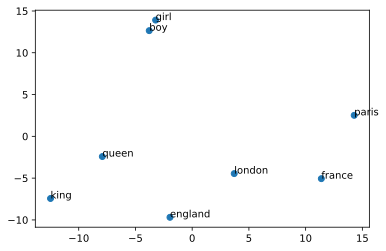

In [16]:
from scipy import linalg
from matplotlib import pyplot

from scipy import linalg

def compute_pca(data, n_components=2):
    """
    Input: 
        data: de dimensão (m,n) onde cada linha corresponde ao embbedding de uma palavra
        n_components: Número de componentes que serão mantidas
    Output: 
        X_reduced: dados transformados com os n_components mais significativos
    """

    m, n = data.shape

    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric,
    # the performance gain is substantial
    evals, evecs = linalg.eigh(R)
    # sort eigenvalue in decreasing order
    # this returns the corresponding indices of evals and evecs
    idx = np.argsort(evals)[::-1]

    evecs = evecs[:, idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :n_components]

    return np.dot(evecs.T, data.T).T

%config InlineBackend.figure_format = 'svg'

words = ['king', 'queen','boy', 'girl', 'paris', 'france','london','england']
# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = [model.wv[word] for word in words]

result= compute_pca(np.array(X), 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

A partir da representação *2d* das palavras, percee-se que pavalaras femininas ficam acima de masculinas (apesar de v(man) e v(woman) estarem próximos). A analogia de capitais aparentemente está correta já que $v(london) - v(england) + v(france)  \sim v(paris)$, sendo $v(i)$ a representação vetorial da palavra $i$.

Para avaliar os modelos será feito avaliação intrínseca, conforme o teste 2, da seguinte forma:

* Insira três palavras e escolha a palavra retornada.
* Calcule a distância da palavra correta ao palavra devolvida.
  * Repita e faça a média.

Neste link: https://github.com/nicholas-leonard/word2vec se encontra as analogias que serão consideradas netes trabalho. O código a seguir faz a aleitura das analogias, armazenando-as numa lista (*analogiasLista*).

In [17]:
with open('questions-words.txt') as f:
  analogias = f.read()

analogias = analogias.lower().split()
analogiasLista = []
for i in range(0, len(analogias), 4):
  #apenas adiciona as analogias em que todas as palavras estão contidas no modelo
  if all(word in model.wv for word in analogias[i:i+4]):
    analogiasLista.append(analogias[i:i+4])


print('Quantidade de analogias: ' + str(len(analogiasLista)) + '\n')
print('Algumas analogias:')
print(analogiasLista[0])
print(analogiasLista[1000])
print(analogiasLista[4000])
print(analogiasLista[1780])

Quantidade de analogias: 18555

Algumas analogias:
['baghdad', 'iraq', 'athens', 'greece']
['banjul', 'gambia', 'islamabad', 'pakistan']
['tehran', 'iran', 'vienna', 'austria']
['doha', 'qatar', 'nassau', 'bahamas']


In [18]:
analogy_scores = model.wv.evaluate_word_analogies('questions-words.txt')

In [20]:
print('Para este primeiro teste a acurácia encontrada foi de:' + str(round(analogy_scores[0]* 100, 2)) + '%')

Para este primeiro teste a acurácia encontrada foi de:20.65%


### 3. Resultados e Avaliação

No código a seguir há 4 loops aninhados sobre diferentes listas de hiperparâmetros, gerando assim **54** modelos. Ao final os modelos forama avaliados com a função *evaluate_word_analogies*, a partir das analogias do arquivo *questions-words.txt*. O método *evaluate_word_analogies* cálcula a performance do modelo a partir de um conjunto de analogias de teste, passado por parâmetro. Este método corresponde ao cálculo de acurácia do artigo original do wordvec [Analogias (State of the art)](https://aclweb.org/aclwiki/Analogy_(State_of_the_art)).

In [23]:
conjuntosTreinamento = [setencesProcessed, setencesProcessed75, setencesProcessed50]
windowsDistance = [5, 7, 10]
trainingAlgorithm = [0, 1]
numFeatures = [100, 200, 300]


dicAccuracy = {}

for algorithm in trainingAlgorithm:
  alg = 'CBOW' if algorithm == 0 else 'Skip-Gram'
  for nfeatures in numFeatures:
    for count, conjunto in enumerate(conjuntosTreinamento):
      if count==0:
        porcentagem='100'
      elif count==1:
        porcentagem='75'
      else:
        porcentagem='50'
      for window in windowsDistance:
        model = word2vec.Word2Vec(conjunto,\
                            workers=8,\
                            size=nfeatures,\
                            window=window,
                            sg=algorithm)
        
        # Para tornar a memória do modelo eficiente
        model.init_sims(replace=True)

        # Salvando o modelo para uso posterior. Pode ser carregado usando Word2Vec.load()
        
        model_name = alg+'_'+porcentagem+'%_'+str(nfeatures)+'_'+str(window)
        model.save(model_name)

        dicAccuracy[model_name] = model.wv.evaluate_word_analogies('questions-words.txt')[0]
    
        print('Acurácia' + model_name +': ' + str(dicAccuracy[model_name]))

np.save('dicAccuracy.npy', dicAccuracy) 

AcuráciaCBOW_100%_100_5: 0.20159873008673962
AcuráciaCBOW_100%_100_7: 0.21446794035943081
AcuráciaCBOW_100%_100_10: 0.2275072283009241
AcuráciaCBOW_75%_100_5: 0.15754767421137053
AcuráciaCBOW_75%_100_7: 0.17180538228479772
AcuráciaCBOW_75%_100_10: 0.18053822847977188
AcuráciaCBOW_50%_100_5: 0.10186129525752168
AcuráciaCBOW_50%_100_7: 0.10995665476797552
AcuráciaCBOW_50%_100_10: 0.11225140234574196
AcuráciaCBOW_100%_200_5: 0.20964907307670502
AcuráciaCBOW_100%_200_7: 0.2235954419184761
AcuráciaCBOW_100%_200_10: 0.227960768751063
AcuráciaCBOW_75%_200_5: 0.161468543931563
AcuráciaCBOW_75%_200_7: 0.17180538228479772
AcuráciaCBOW_75%_200_10: 0.17893423632151131
AcuráciaCBOW_50%_200_5: 0.09963029066802652
AcuráciaCBOW_50%_200_7: 0.10249872514023457
AcuráciaCBOW_50%_200_10: 0.11378123406425293
AcuráciaCBOW_100%_300_5: 0.2086852996201599
AcuráciaCBOW_100%_300_7: 0.22274505357446567
AcuráciaCBOW_100%_300_10: 0.22767730596972618
AcuráciaCBOW_75%_300_5: 0.15938929483752154
AcuráciaCBOW_75%_300_7:

O modelo que obteve a maior acurácia foi o que utilizou o algorítmo **Skip-gram, 100% do conjunto de treinamento, dimensionalidade dos vetores de palavras igual a 100 e tamanho de janela igual 10**. Observa-se que ganha-se desempenho ao utilizar o algoritmo Skip-gram, com mais dados, e maiores tamanhos de janela. Perde-se desempenho ao utilizar dimensionalidades dos vetores de palavras maiores que 100. A seguir será plotado algumas analogias (avaliação intrínseca) obtidas com o melhor modelo:


In [30]:
import gensim
from gensim.models import KeyedVectors
bestmodel = KeyedVectors.load('Skip-Gram_100%_100_10')
print('Acuracia:' + str(round(bestmodel.wv.evaluate_word_analogies('questions-words.txt')[0], 2)))

Acuracia:0.29


##### Analogias de Gênero

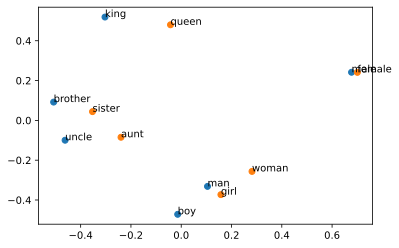

In [75]:
male = ['man', 'king', 'boy', 'uncle', 'brother', 'male' ]
female = ['woman', 'queen', 'girl', 'aunt', 'sister', 'female']
# given a list of words and the embeddings, it returns a matrix with all the embeddings
Xmale = [bestmodel.wv[word] for word in male]
Xfemale = [bestmodel.wv[word] for word in female]

result = compute_pca(np.array(Xmale + Xfemale), 2)

pyplot.scatter(result[0:6, 0], result[0:6, 1])
pyplot.scatter(result[6:12, 0], result[6:12, 1])

for i, word in enumerate(male):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

for i, word in enumerate(female):
    pyplot.annotate(word, xy=(result[i+6, 0], result[i+6, 1]))

pyplot.show()

A diferenças de gênero entre as palavras femininas e masculinas não se manteve constante, mas percebe-se que nessa representação as palavras masculinas se mantém a esquerda de suas respectivas palavras femininas.

#### Analogias de País-Capital

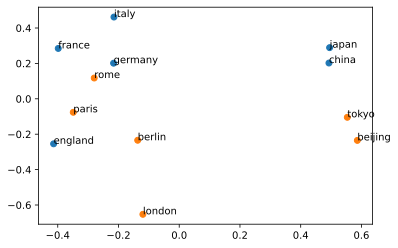

In [72]:
countries = ['france', 'england', 'germany', 'japan', 'italy', 'china']
capitals = ['paris', 'london', 'berlin', 'tokyo', 'rome', 'beijing']
# given a list of words and the embeddings, it returns a matrix with all the embeddings
Xcountries = [bestmodel.wv[word] for word in countries]
Xcapitals = [bestmodel.wv[word] for word in capitals]

result = compute_pca(np.array(Xcountries + Xcapitals), 2)

pyplot.scatter(result[0:6, 0], result[0:6, 1])
pyplot.scatter(result[6:12, 0], result[6:12, 1])

for i, word in enumerate(countries):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

for i, word in enumerate(capitals):
    pyplot.annotate(word, xy=(result[i+6, 0], result[i+6, 1]))

pyplot.show()

A diferenças de gênero entre os países e suas respectivas capitais não se manteve constante, mas percebe-se que nessa representação os países de encontram sempre acima de suas respectivas capitais.

#### Analogias de Adjetivo-Superlativo


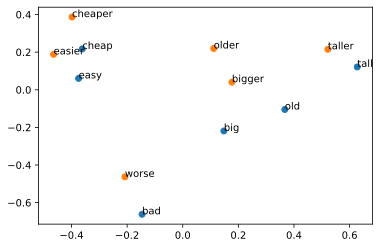

In [69]:
adjetivos = ['big', 'bad', 'cheap', 'tall', 'easy', 'old']
superlativos = ['bigger', 'worse', 'cheaper', 'taller', 'easier', 'older']
# given a list of words and the embeddings, it returns a matrix with all the embeddings
Xadjetivos = [bestmodel.wv[word] for word in adjetivos]
Xsuperlativos = [bestmodel.wv[word] for word in superlativos]

result = compute_pca(np.array(Xadjetivos+ Xsuperlativos), 2)

pyplot.scatter(result[0:6, 0], result[0:6, 1])
pyplot.scatter(result[6:12, 0], result[6:12, 1])

for i, word in enumerate(adjetivos):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

for i, word in enumerate(superlativos):
    pyplot.annotate(word, xy=(result[i+6, 0], result[i+6, 1]))

pyplot.show()

A diferenças entre os adjetivos e suas formas superlativas não se manteve constante, que os superlativos se encontram sempre acima na representação.

#### Analogias de Singular-Plural

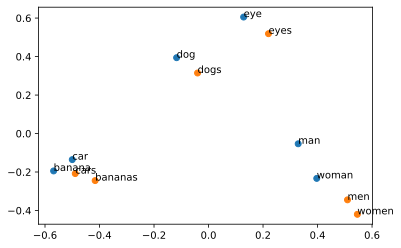

In [71]:
adjetivos = ['banana', 'man', 'woman', 'dog', 'car', 'eye']
superlativos = ['bananas', 'men', 'women', 'dogs', 'cars', 'eyes']
# given a list of words and the embeddings, it returns a matrix with all the embeddings
Xadjetivos = [bestmodel.wv[word] for word in adjetivos]
Xsuperlativos = [bestmodel.wv[word] for word in superlativos]

result = compute_pca(np.array(Xadjetivos+ Xsuperlativos), 2)

pyplot.scatter(result[0:6, 0], result[0:6, 1])
pyplot.scatter(result[6:12, 0], result[6:12, 1])

for i, word in enumerate(adjetivos):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

for i, word in enumerate(superlativos):
    pyplot.annotate(word, xy=(result[i+6, 0], result[i+6, 1]))

pyplot.show()

A diferenças entre as palavras no singular e suas representações no plural não se manteve contante, mas a direção se manteve, de forma que as representações no plural na fugura acima se encontram sempre abaixo de suas respectivas representações no singular.

Apsesar do melhor modelo obtido presentar acurácia baixa de analogias (29%), a a palavra obtida sempre se encontra próxima da palavra correta.